In [1]:
import pandas as pd
import numpy as np

import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telcom = pd.read_excel("Telco Churn Data.xlsx")
telcom.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,113,28.34,122,12.61,121,8.41,3,2.73


In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nMissing values : ", telcom.isnull().sum().values.sum())
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nData Types :  \n", telcom.dtypes)
print ("\nUnique values :  \n", telcom.nunique())


Rows     :  3333
Columns  :  17

Missing values :  0

Features : 
 ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Churn', "Int'l Plan", 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge']

Data Types :  
 Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
dtype: object

Unique values :  
 Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan    

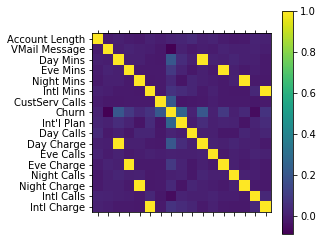

In [4]:
plt.matshow(telcom.corr())
plt.xticks(range(len(telcom.columns)), '')
plt.yticks(range(len(telcom.columns)), telcom.columns)
plt.colorbar()
plt.show()

#### Charges and mins are perfectly correlated 
##### Mins feature should be excluded

In [5]:
# List similar columns
charge_cols = [col for col in telcom.columns if 'Charge' in col]
calls_cols  = [col for col in telcom.columns if ('Calls' in col) & ('CustServ' not in col)]
mins_cols   = [col for col in telcom.columns if 'Mins' in col]

In [6]:
# Aggregate similar columns
telcom['Total Charge'] = telcom[charge_cols].sum(axis = 1)
telcom['Total Calls']  = telcom[calls_cols].sum(axis = 1)
telcom['Total Mins']   = telcom[mins_cols].sum(axis = 1)

In [7]:
#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == 1]
not_churn = telcom[telcom["Churn"] == 0]

## Data Exploration

In [8]:
# Num of Churn vs Not Churn
telcom['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [9]:
telcom.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Total Charge', 'Total Calls',
       'Total Mins'],
      dtype='object')

In [10]:
sns.set_palette("muted")
def plot_distribution(feature, split = True):
    if split:
        sns.distplot(churn[feature], kde = False, label= 'Churn',
                     color = 'blue',
                     bins = 20
                    )
        sns.distplot(not_churn[feature], kde = False, label= 'Not Churn', 
                     bins = 20
                    )
        plt.legend()
    else:
        sns.distplot(telcom[feature], kde = False, 
                     bins = 20
                     
                    )

    
    plt.title(feature + " Distribution")
    plt.show()

def plot_pair_relation(features):
    sns.pairplot(telcom, hue = 'Churn', vars = features, 
                 kind = 'reg',
                 plot_kws={'scatter_kws': {'alpha': 0.3}})
    plt.show()
    

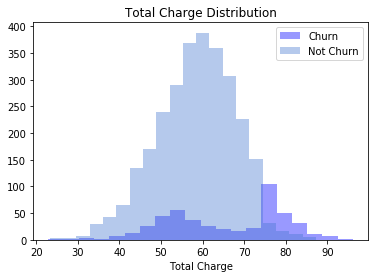

In [11]:
plot_distribution('Total Charge', split = True)

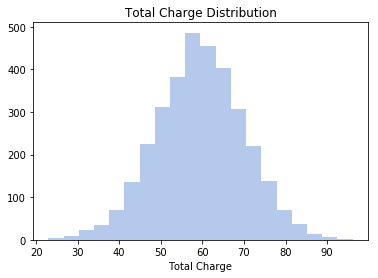

In [12]:
plot_distribution('Total Charge', split = False)

#### Note: Total Charge > 70 Then High Value

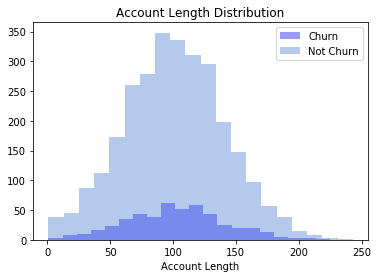

In [13]:
plot_distribution('Account Length', split = True)

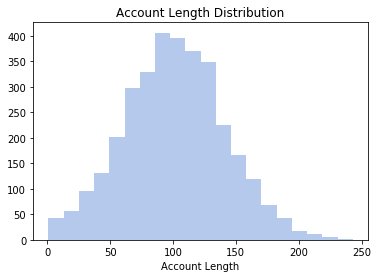

In [14]:
plot_distribution('Account Length', split = False)

#### Note: Account Length > 120 Then Old

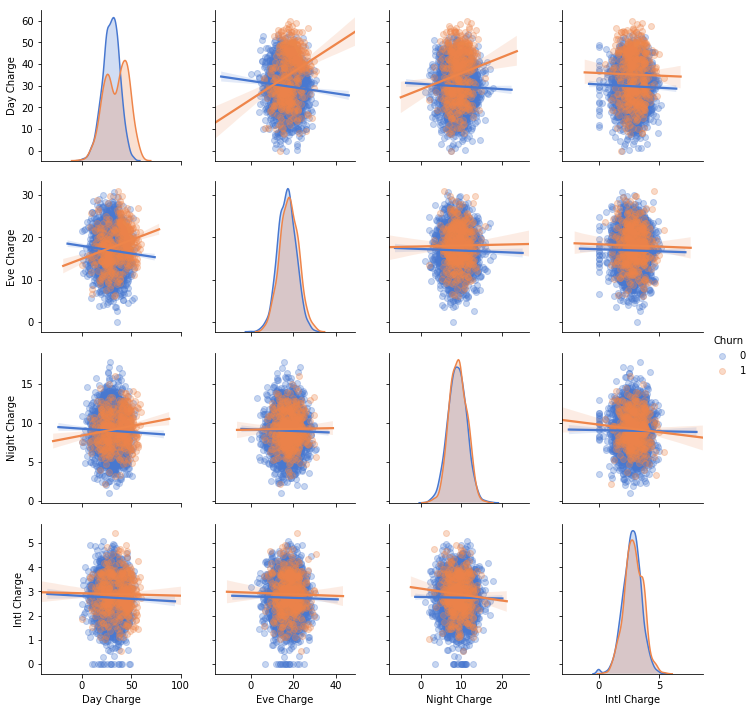

In [15]:
plot_pair_relation(charge_cols)

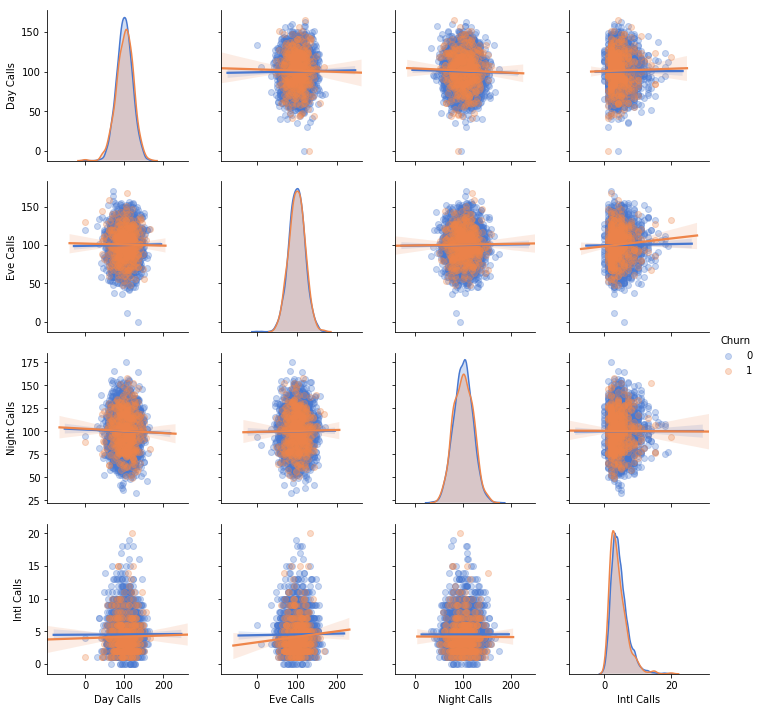

In [16]:
plot_pair_relation(calls_cols)

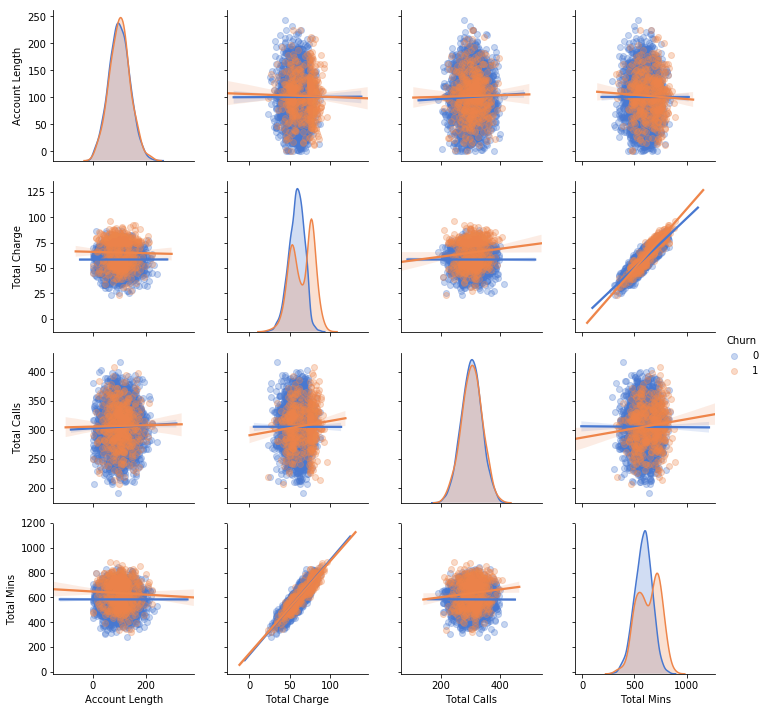

In [17]:
plot_pair_relation(['Account Length','Total Charge', 'Total Calls','Total Mins'])

#### Note: #calls unrelated to #minutes

#### Note: User with intl plan is more likely to churn

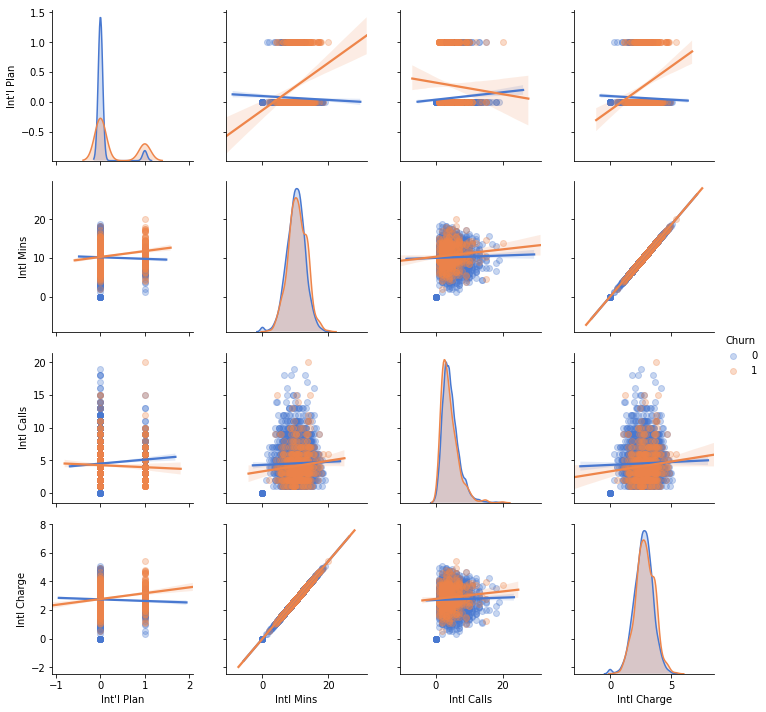

In [18]:
plot_pair_relation(["Int'l Plan", 'Intl Mins', 'Intl Calls', 'Intl Charge'])

# Features addition

In [19]:
telcom.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Total Charge', 'Total Calls',
       'Total Mins'],
      dtype='object')

In [20]:
# Call length = Call Mins / #Calls
for type_ in ['Day', 'Eve', 'Night', 'Intl', 'Total']: 
    telcom[type_ + ' Call Length'] = telcom[type_ + ' Mins'] / telcom[type_ + ' Calls'] 
    
    # if dividen = 0 , set the ratio into 0 
    telcom.loc[telcom[type_ + ' Calls']  == 0 , type_ + ' Call Length'] = 0

In [21]:
# Dominant time
for type_ in ['Day', 'Eve', 'Night']: 
    telcom['Dominant ' + type_] = ((telcom[type_ + ' Calls'] >= telcom['Day Calls']) & 
                                      (telcom[type_ + ' Calls'] >= telcom['Eve Calls']) & 
                                      (telcom[type_ + ' Calls'] >= telcom['Night Calls'])).astype(int)
    

In [22]:
# High Value User (Based on Total Charge)
threshold_high_value = 70
telcom['High Value'] = (telcom['Total Charge'] > threshold_high_value).astype(int)

# Old User (Based on Account Length)
threshold_old_user = 120
telcom['Old User'] = (telcom['Account Length'] > threshold_old_user).astype(int)


In [23]:
# CustServ Calls groupint (0, 1 and more)
telcom['CustServ Calls 0'] = (telcom['CustServ Calls'] == 0).astype(int)
telcom['CustServ Calls 1'] = (telcom['CustServ Calls'] == 1).astype(int)
telcom['CustServ Calls 2'] = (telcom['CustServ Calls'] > 1).astype(int)

# PCA 

In [24]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components = n_components)
target_col = ["Churn"]
X = telcom[[i for i in telcom.columns if i not in target_col ]]
Y = telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ['PC' + str(i + 1) for i in range(n_components)])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

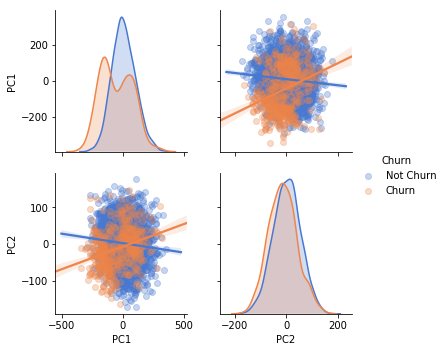

In [25]:
sns.pairplot(pca_data, hue = 'Churn',
             kind = 'reg',
             plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

In [26]:
## Add PC to dataset 

for col_name in ['PC' + str(i + 1) for i in range(n_components)]: 
    telcom[col_name] = pca_data[col_name]


# Modeling Preprocessing

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [28]:
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() <= 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col]

In [29]:
def standarize_num_cols(X_train, X_test):

    scaler = StandardScaler()
    
    X_train.reset_index(drop = True, inplace = True)
    X_test.reset_index(drop = True, inplace = True)

    scaled = scaler.fit_transform(X_train[num_cols])
    scaled = pd.DataFrame(scaled,columns=num_cols)
    X_train[num_cols] = scaled

    scaled_test = scaler.transform(X_test[num_cols])
    scaled_test = pd.DataFrame(scaled_test,columns=num_cols)
    X_test[num_cols] = scaled_test

    return X_train, X_test, scaler

def oversampling(X_train, y_train):
    
    os = SMOTE(random_state= 123)
    X_train_os,y_train_os = os.fit_sample(X_train,y_train)
    
    X_train_os = pd.DataFrame(data = X_train_os,columns=X_train.columns)
    
    return X_train_os,y_train_os
    
    

In [30]:
X_train, X_test, y_train, y_test = train_test_split(telcom[cat_cols + num_cols], telcom['Churn'], 
                                                    test_size = 0.2, stratify = telcom['Churn'], 
                                                    random_state = 123)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [31]:
X_train, X_test, scaler = standarize_num_cols(X_train, X_test)

X_train, y_train = oversampling(X_train, y_train)

In [32]:
y_train.sum(), y_train.size

(2280, 4560)

# Modeling Fitting & Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [34]:
logit = LogisticRegression()
svc = SVC()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier(n_estimators= 500)
gb_bg = GradientBoostingClassifier(n_estimators= 1000)
rf = RandomForestClassifier(n_estimators= 500)
nn_sm = MLPClassifier(hidden_layer_sizes=(50, 100, 80, 30))
nn_bg = MLPClassifier(hidden_layer_sizes=(50, 200, 100, 80, 50, 30, 15))  
voting = VotingClassifier(estimators = [('gb', gb), ('rf', rf)], voting = 'soft')

In [35]:
dict_model = {
    'logit' : logit, 
    'svc' : svc, 
    'ada' : ada,
    'gb' : gb, 
    'gb_bg' : gb_bg,
    'rf' : rf,
    'voting' : voting,
    'nn_sm' : nn_sm, 
    'nn_bg' : nn_bg,
}

In [36]:
#Fitting
for name, model in dict_model.items():
    print(name)
    model.fit(X_train, y_train)

logit
svc
ada
gb
gb_bg
rf
voting
nn_sm
nn_bg


In [37]:
dict_eval = {} 
dict_eval['model_name'] = []
dict_eval['train_acc'] = []
dict_eval['test_acc'] = []
dict_eval['train_precision'] = []
dict_eval['test_precision'] = []
dict_eval['train_recall'] = []
dict_eval['test_recall'] = []
dict_eval['train_roc'] = []
dict_eval['test_roc'] = []
dict_eval['train_TP'] = []
dict_eval['test_TP'] = []
dict_eval['train_TN'] = []
dict_eval['test_TN'] = []
dict_eval['train_FP'] = []
dict_eval['test_FP'] = []
dict_eval['train_FN'] = []
dict_eval['test_FN'] = []

for name, model in dict_model.items():
    dict_eval['model_name'].append(name)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #acc
    train_acc = accuracy_score(y_train, y_pred_train)
    dict_eval['train_acc'].append(train_acc)
    test_acc = accuracy_score(y_test, y_pred_test)
    dict_eval['test_acc'].append(test_acc)
    
    #precision
    train_precision = precision_score(y_train, y_pred_train)
    dict_eval['train_precision'].append(train_precision)
    test_precision = precision_score(y_test, y_pred_test)
    dict_eval['test_precision'].append(test_precision)
    
    #recall 
    train_recall = precision_score(y_train, y_pred_train)
    dict_eval['train_recall'].append(train_recall)
    test_recall = precision_score(y_test, y_pred_test)
    dict_eval['test_recall'].append(test_recall)
    
    #recall 
    train_roc = roc_auc_score(y_train, y_pred_train)
    dict_eval['train_roc'].append(train_roc)
    test_roc = roc_auc_score(y_test, y_pred_test)
    dict_eval['test_roc'].append(test_roc)
    
    #confusion metric
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    dict_eval['train_TP'].append(cm_train[0,0])
    dict_eval['test_TP'].append(cm_test[0,0])
    dict_eval['train_TN'].append(cm_train[1,1])
    dict_eval['test_TN'].append(cm_test[1,1])
    dict_eval['train_FP'].append(cm_train[0,1])
    dict_eval['test_FP'].append(cm_test[0,1])
    dict_eval['train_FN'].append(cm_train[1,0])
    dict_eval['test_FN'].append(cm_test[1,0])
    

In [38]:
pd.DataFrame(dict_eval)

,model_name,train_acc,test_acc,train_precision,test_precision,train_recall,test_recall,train_roc,test_roc,train_TP,test_TP,train_TN,test_TN,train_FP,test_FP,train_FN,test_FN
0,logit,0.834211,0.833583,0.824532,0.460674,0.824532,0.460674,0.834211,0.838470,1868,474,1936,82,412,96,344,15
1,svc,0.914474,0.925037,0.937095,0.723810,0.937095,0.723810,0.914474,0.866314,2144,541,2026,76,136,29,254,21
2,ada,0.923246,0.905547,0.932348,0.649123,0.932348,0.649123,0.923246,0.846356,2129,530,2081,74,151,40,199,23
3,gb,1.000000,0.983508,1.000000,0.977778,1.000000,0.977778,1.000000,0.951854,2280,568,2280,88,0,2,0,9
4,gb_bg,1.000000,0.983508,1.000000,0.977778,1.000000,0.977778,1.000000,0.951854,2280,568,2280,88,0,2,0,9
5,rf,1.000000,0.974513,1.000000,0.965116,1.000000,0.965116,1.000000,0.925203,2280,567,2280,83,0,3,0,14
6,voting,1.000000,0.983508,1.000000,0.977778,1.000000,0.977778,1.000000,0.951854,2280,568,2280,88,0,2,0,9
7,nn_sm,1.000000,0.914543,1.000000,0.743902,1.000000,0.743902,1.000000,0.796012,2280,549,2280,61,0,21,0,36
8,nn_bg,1.000000,0.919040,1.000000,0.731183,1.000000,0.731183,1.000000,0.828586,2280,545,2280,68,0,25,0,29


In [39]:
for name, model in dict_model.items():
    print(name)
    y_pred_test = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_test))
    

logit
[[474  96]
 [ 15  82]]
svc
[[541  29]
 [ 21  76]]
ada
[[530  40]
 [ 23  74]]
gb
[[568   2]
 [  9  88]]
gb_bg
[[568   2]
 [  9  88]]
rf
[[567   3]
 [ 14  83]]
voting
[[568   2]
 [  9  88]]
nn_sm
[[549  21]
 [ 36  61]]
nn_bg
[[545  25]
 [ 29  68]]


# Conclusion 

### Gradient boosting algorithm has the best accuracy, recall, precision and ROC score on test data
### We are going to use Gradient boosting for this churn case